theta moments: 8.7644
alpha moments: 1.9191
theta MLE: 8.7644
alpha MLE: 1.9191



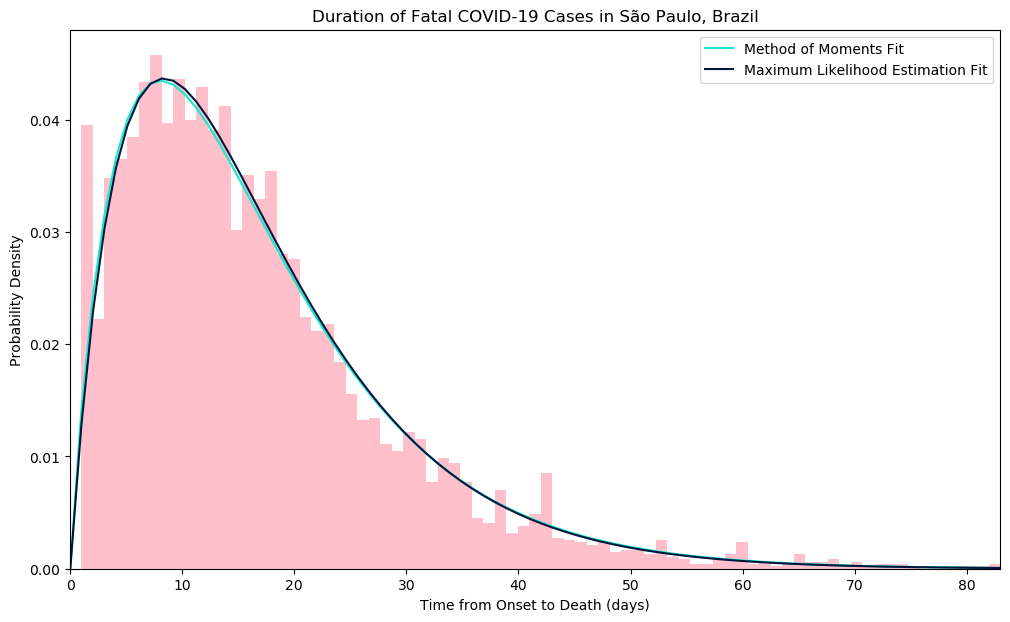

In [8]:
#I worked with Brian Shoffeit on this problem
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.special import gamma, digamma
from scipy.misc import derivative
   
# import data as a dataframe and extract to numpy array
url = (r'https://raw.githubusercontent.com/mrc-ide/Brazil_COVID19_distributions/52241f817d74b96a7df0a82dff5b770b5caf7914/data/onset-to-death.csv')
data_csv = pd.read_csv(url)
data = data_csv.loc[(data_csv["Start_date"] >= "2020-04-01")  
                    & (data_csv["Start_date"] <= "2020-04-30")
                    & (data_csv["State"] == "SP")
                    & (data_csv["onset-to-death"] > 0) ]["onset-to-death"].to_numpy()

# Part (a)
mean = np.mean(data)
n = data.size

# compute the method of moments estimators from the formulae above
theta_moments = np.sum([(x - mean)**2 for x in data])/(n * mean)
alpha_moments = (n * mean**2) / np.sum([(x - mean)**2 for x in data])

# Part (b)
# define h as above and use Newton–Ralphson method to find the root of h
h = lambda alpha : np.log(mean / alpha) - np.sum(np.log(data))/n + digamma(alpha)
alpha_MLE = optimize.newton(h, alpha_moments)

# compute the MLE of theta with the formula above now that we have the MLE of alpha
theta_MLE = mean / alpha_MLE

print('theta moments: ' + str(round(theta_moments, 4)))
print('alpha moments: ' + str(round(alpha_moments, 4)))
print('theta MLE: ' + str(round(theta_moments, 4)))
print('alpha MLE: ' + str(round(alpha_moments, 4)) + '\n')

# Part (c)
# plot the onset-to-death times in a density histogram with bin size one
fig, ax = plt.subplots(figsize=(12, 7))
n, bins, patches = ax.hist(data, np.unique(data).size, density=True, color='#ffc0cb')

# plot pdf for gamma distribution with the MOM and MLE parameter values
f = lambda x, theta, alpha : np.heaviside(x, x) * x**(alpha - 1) * np.exp(-x / theta) / (theta**alpha * gamma(alpha))
bins = np.insert(bins, 0, 0) # prepend zero to bins
moments_line, = ax.plot(bins, np.array([f(b, theta_moments, alpha_moments) for b in bins]), color='#13eac9')
MLE_line, = ax.plot(bins, np.array([f(b, theta_MLE, alpha_MLE) for b in bins]), color='#01153e')

ax.set_xlim([0, 83])
ax.set_xlabel('Time from Onset to Death (days)')
ax.set_ylabel('Probability Density')
ax.set_title('Duration of Fatal COVID-19 Cases in São Paulo, Brazil')
ax.legend([moments_line, MLE_line], ['Method of Moments Fit', 'Maximum Likelihood Estimation Fit'])
plt.show()